In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = '../output_videos/player.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

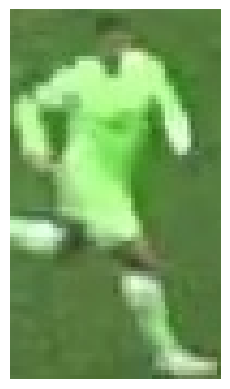

In [3]:
plt.imshow(image)
plt.axis('off')
plt.show()

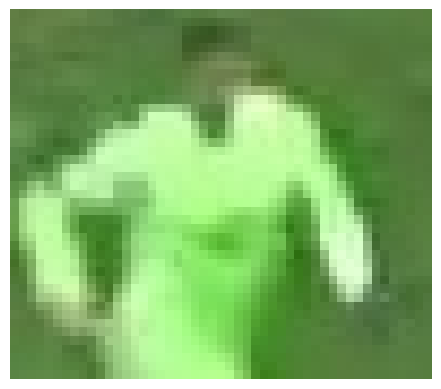

In [4]:
# take the top half of the image
height, width, _ = image.shape
top_half = image[:height // 2, :, :]
plt.imshow(top_half)
plt.axis('off')
plt.show()


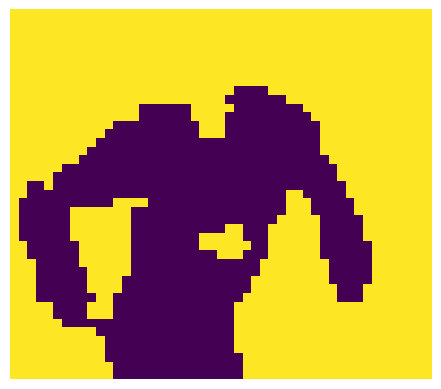

In [9]:
# cluster the image into 2 colors
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
top_half_reshaped = top_half.reshape(-1, 3)
kmeans.fit(top_half_reshaped)
labels = kmeans.labels_
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])
plt.imshow(clustered_image)
plt.axis('off')
plt.show()

In [10]:
corner_clusterd = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_clusterd = max(set(corner_clusterd), key=corner_clusterd.count)
print(f"Non-player cluster: {non_player_clusterd}")

Non-player cluster: 1


In [11]:
player_cluster = 1 - non_player_clusterd
print(f"Player cluster: {player_cluster}")

Player cluster: 0


In [12]:
kmeans.cluster_centers_[player_cluster]

array([171.11330698, 235.40316206, 142.52700922])